In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from networkx.drawing.nx_agraph import graphviz_layout
import copy
import time
from IPython.display import display, clear_output, Markdown
import heapq

In [5]:
g = nx.Graph()

# Graph Vertices and Edges:

In [6]:
g.add_edge('Oradea', 'Zerind', weight=71)
g.add_edge('Oradea', 'Sibiu', weight=151)
g.add_edge('Zerind', 'Arad', weight=75)
g.add_edge('Arad', 'Sibiu', weight=140)
g.add_edge('Arad', 'Timisoara', weight=118)
g.add_edge('Timisoara', 'Lugoj', weight=111)
g.add_edge('Lugoj', 'Mehadia', weight=70)
g.add_edge('Mehadia', 'Drobeta', weight=75)
g.add_edge('Drobeta', 'Craiova', weight=120)
g.add_edge('Sibiu', 'Fagaras', weight=99)
g.add_edge('Sibiu', 'Rimnicu Vilcea', weight=80)
g.add_edge('Rimnicu Vilcea', 'Craiova', weight=146)
g.add_edge('Craiova', 'Pitesti', weight=138)
g.add_edge('Rimnicu Vilcea', 'Pitesti', weight=97)
g.add_edge('Fagaras', 'Bucharest', weight=211)
g.add_edge('Pitesti', 'Bucharest', weight=101)
g.add_edge('Bucharest', 'Urziceni', weight=85)
g.add_edge('Bucharest', 'Giurgiu', weight=90)
g.add_edge('Urziceni', 'Hirsova', weight=98)
g.add_edge('Hirsova', 'Eforie', weight=86)
g.add_edge('Urziceni', 'Vaslui', weight=92)
g.add_edge('Vaslui', 'Iasi', weight=92)
g.add_edge('Iasi', 'Neamt', weight=87)

{'Oradea': {'weight': 151}, 'Arad': {'weight': 140}, 'Fagaras': {'weight': 99}, 'Rimnicu Vilcea': {'weight': 80}}
[['Oradea', 151], ['Arad', 140], ['Fagaras', 99], ['Rimnicu Vilcea', 80]]


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


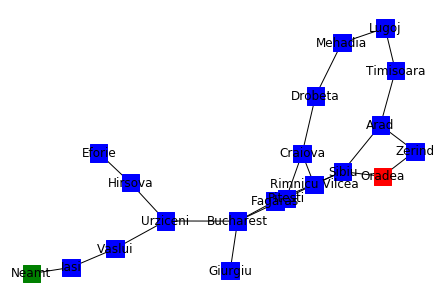

Oradea {'Zerind': {'weight': 71}, 'Sibiu': {'weight': 151}}
Zerind {'Oradea': {'weight': 71}, 'Arad': {'weight': 75}}
Sibiu {'Oradea': {'weight': 151}, 'Arad': {'weight': 140}, 'Fagaras': {'weight': 99}, 'Rimnicu Vilcea': {'weight': 80}}
Arad {'Zerind': {'weight': 75}, 'Sibiu': {'weight': 140}, 'Timisoara': {'weight': 118}}
Timisoara {'Arad': {'weight': 118}, 'Lugoj': {'weight': 111}}
Lugoj {'Timisoara': {'weight': 111}, 'Mehadia': {'weight': 70}}
Mehadia {'Lugoj': {'weight': 70}, 'Drobeta': {'weight': 75}}
Drobeta {'Mehadia': {'weight': 75}, 'Craiova': {'weight': 120}}
Craiova {'Drobeta': {'weight': 120}, 'Rimnicu Vilcea': {'weight': 146}, 'Pitesti': {'weight': 138}}
Fagaras {'Sibiu': {'weight': 99}, 'Bucharest': {'weight': 211}}
Rimnicu Vilcea {'Sibiu': {'weight': 80}, 'Craiova': {'weight': 146}, 'Pitesti': {'weight': 97}}
Pitesti {'Craiova': {'weight': 138}, 'Rimnicu Vilcea': {'weight': 97}, 'Bucharest': {'weight': 101}}
Bucharest {'Fagaras': {'weight': 211}, 'Pitesti': {'weight': 1

In [7]:
starting_node = 'Neamt'
end_node = 'Oradea'
for node in g.nodes:
    nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
    if node == starting_node:
        nx.set_node_attributes(g, {node: {'source': True}})
    if node == end_node:
        nx.set_node_attributes(g, {node: {'destination': True}})

print(g['Sibiu'])
print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
nx.draw(g, with_labels=True,node_color=color_map, node_shape='s' )
plt.show()

for k in g.nodes():
    print(str(k) + " " + str(g[k]))

# Breadth First Search:

In [8]:
def bfs(graph, starting_point, end_point):
    explored = []
    end_point_found = None
    queue = [(starting_point,[])]
    total_nodes_visited = 0
    while queue or end_point_found:
        clear_output(wait=True) # Clear Output of each loop
        current_node, path = queue.pop(0)
#         print(current_node)
#         print('Queue State:')
#         print(queue)
#         print('Explored State:')
#         print(explored)
        if graph.nodes[current_node]['destination'] == True:
#             print('Total Nodes Visited : ' + str(total_nodes_visited))
#             print(explored)
            return path + [current_node]
        
        if current_node not in explored and graph.nodes[current_node]['traversed'] != True:
            total_nodes_visited += 1
            #print(node)
            #print(graph_arr[node[1]][node[0]])
            if graph.nodes[current_node]['source'] != True and graph.nodes[current_node]['destination'] != True:
                nx.set_node_attributes(g, {current_node: {'traversed': True}})
#                 my_pos=graphviz_layout(graph,'dot')
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
                nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.15)
#             temp_color = visual_arr[node[1]][node[0]]
#             visual_arr[node[1]][node[0]] = "<span style='color:red'>" + graph_arr[node[1]][node[0]] + "</span>"
#             display(Markdown('<br>'.join(''.join(block for block in line) for line in visual_arr)))
#             
#             visual_arr[node[1]][node[0]] = "<span style='color:green'>" + graph_arr[node[1]][node[0]] + "</span>"
            
            explored.append(current_node)
            neighbours_with_weights = [[k,v['weight']] for k,v in g[current_node].items() ]
            neighbors_sorted = sorted(neighbours_with_weights, key = lambda x:x[1])
            print(neighbors_sorted)
            for neighbour, weight in neighbors_sorted:
                if neighbour not in explored and graph.nodes[current_node]['traversed'] != True:
                    queue.append((neighbour, path + [current_node]))
       
    print('End point Found : ' + str(end_point_found))
    print('Queue Empty : ' + str(queue))
    print('Total Nodes Visited : ' + str(total_nodes_visited))
    return None

['Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni', 'Hirsova']
Total Cost : 633


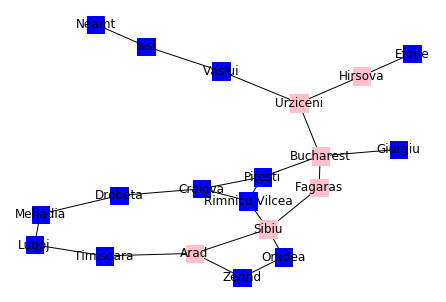

In [30]:
starting_node = 'Arad'
end_node = 'Hirsova'
for node in g.nodes:
    nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
    if node == starting_node:
        nx.set_node_attributes(g, {node: {'source': True}})
    if node == end_node:
        nx.set_node_attributes(g, {node: {'destination': True}})

print(g['Sibiu'])
print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
nx.draw(g, with_labels=True,node_color=color_map )
plt.show()


path = bfs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node))
print(path)
cost = 0
traverser = iter(path)
current_node = next(traverser)
while current_node != end_node:
#     print(current_node)
    next_node = next(traverser)
    cost += g[current_node][next_node]['weight']
#     print(cost)
    current_node = next_node
print('Total Cost : ' + str(cost))
if path != None:
    color_map = ['pink' if i in path else 'blue' for i in g.nodes]
    my_pos = nx.spring_layout(g, seed=10)
    nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
    plt.show()

# Uniform Cost Search:

In [10]:
class PriorityQueue:
        
        def __init__(self):
            self.elements = []
    
        def empty(self):
            return len(self.elements) == 0
        
        def not_empty(self):
            return not len(self.elements) == 0
        
        def push(self, item, priority):
            return heapq.heappush(self.elements, (priority, item))

        def pop(self):
            return heapq.heappop(self.elements)

In [17]:
def ucs(graph, starting_point, end_point):
    explored = []
    end_point_found = None
    queue = PriorityQueue()
    queue.push((starting_point,[]),0)
    total_nodes_visited = 0
    while queue.not_empty() or end_point_found:
        clear_output(wait=True) # Clear Output of each loop
        priority, (current_node, path) = queue.pop()
#         print(current_node)
#         print('Queue State:')
#         print(queue)
#         print('Explored State:')
#         print(explored)
        if graph.nodes[current_node]['destination'] == True:
#             print('Total Nodes Visited : ' + str(total_nodes_visited))
#             print(explored)
            print('Cost : ' + str(priority))
            return path + [current_node]
        
        if current_node not in explored and graph.nodes[current_node]['traversed'] != True:
            total_nodes_visited += 1
            #print(node)
            #print(graph_arr[node[1]][node[0]])
            if graph.nodes[current_node]['source'] != True and graph.nodes[current_node]['destination'] != True:
                nx.set_node_attributes(g, {current_node: {'traversed': True}})
#                 my_pos=graphviz_layout(graph,'dot')
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
                nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.15)
#             temp_color = visual_arr[node[1]][node[0]]
#             visual_arr[node[1]][node[0]] = "<span style='color:red'>" + graph_arr[node[1]][node[0]] + "</span>"
#             display(Markdown('<br>'.join(''.join(block for block in line) for line in visual_arr)))
#             
#             visual_arr[node[1]][node[0]] = "<span style='color:green'>" + graph_arr[node[1]][node[0]] + "</span>"
            
            explored.append(current_node)
            for neighbour, v in g[current_node].items():
                if neighbour not in explored and graph.nodes[current_node]['traversed'] != True:
                    queue.push((neighbour, path + [current_node]),priority + v['weight'])
       
    print('End point Found : ' + str(end_point_found))
    print('Queue Empty : ' + str(queue))
    print('Total Nodes Visited : ' + str(total_nodes_visited))
    return None

Cost : 601
['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest', 'Urziceni', 'Hirsova']


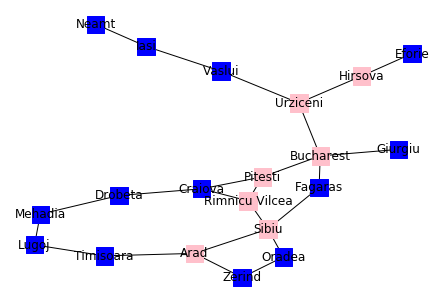

In [118]:
starting_node = 'Arad'
end_node = 'Hirsova'
for node in g.nodes:
    nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
    if node == starting_node:
        nx.set_node_attributes(g, {node: {'source': True}})
    if node == end_node:
        nx.set_node_attributes(g, {node: {'destination': True}})

print(g['Sibiu'])
print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
nx.draw(g, with_labels=True,node_color=color_map )
plt.show()


path = ucs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node))
print(path)
if path != None:
    color_map = ['pink' if i in path else 'blue' for i in g.nodes]
    my_pos = nx.spring_layout(g, seed=10)
    nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
    plt.show()

# Greedy Best First Search:

In [113]:
def gbfs(graph, start_node, end_node, heuristics):
        pqueue = PriorityQueue()
        
        pqueue.push((start_node, []), 0) # Inititial point and priority
        flag = False
        explored = []
        while not pqueue.empty():
            clear_output(wait=True)
#             print(pqueue.elements)
            
            priority, (current_node, path) = pqueue.pop()
            if graph.nodes[current_node]['examined'] == True:
                break
            print(current_node)
            if graph.nodes[current_node]['destination'] == True or flag:
#                 path = []
#                 current = current
#                 while current is not None:
#                     clear_output(wait=True) 
#                     self.visual_arr[current.position[1]][current.position[0]] = "<span style='color:blue'>" + self.graph[current.position[1]][current.position[0]] + "</span>"
#                     display(Markdown('<br>'.join(''.join(block for block in line) for line in self.visual_arr)))
#                     time.sleep(0.05)
#                     path.append(current.position)
#                     current = current.parent
                return path + [current_node], priority
                break
            else:
                for neighbour, v in g[current_node].items():
                    if neighbour in explored:
                        continue
#                     print('We stuck here')
                    if graph.nodes[neighbour]['traversed'] != True:
                        nx.set_node_attributes(g, {neighbour: {'traversed': True}})
                        
                        h = heuristics[neighbour]
                        
                        if graph.nodes[current_node]['destination'] == True:
                            flag= True
                            break
                        
                        

                        
                        explored.append(neighbour)
                        pqueue.push((neighbour, path + [current_node]),priority + h)
                        
                        
              
                nx.set_node_attributes(g, {current_node: {'examined': True}})          
#                 current.mark_examined()
                  # Visualization
                 
#                         print(str(neighbor.position) + str(neighbor.visit_count))
#                 my_pos = nx.spring_layout(graph, seed=10)
#                 color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
#                 nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
#                 plt.show()
                    # Visualization
#                 clear_output(wait=True) 
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
                nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.30)
                
            

In [114]:
heuristics_table = {
    'Arad' :366,'Mehadia':241,
    'Bucharest':0,'Neamt':234,
    'Craiova':160,'Oradea':380,
    'Drobeta':242,'Pitesti':100,
    'Eforie':161,'Rimnicu Vilcea':193,
    'Fagaras':176,'Sibiu':253,
    'Giurgiu':77,'Timisoara':329,
    'Hirsova':151,'Urziceni':80,
    'Iasi':226,'Vaslui':199,
    'Lugoj':244,'Zerind':374,
}

Hirsova
['Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni', 'Hirsova']
Heuristic total Cost : 660
Total edge Cost : 633


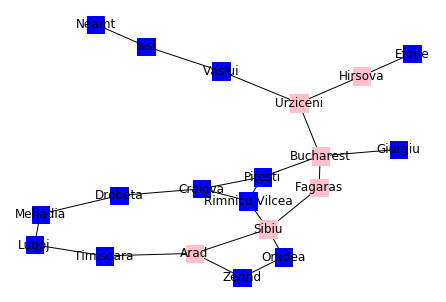

In [121]:
starting_node = 'Arad'
end_node = 'Hirsova'
for node in g.nodes:
    nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False, 'examined':False}})
    if node == starting_node:
        nx.set_node_attributes(g, {node: {'source': True}})
    if node == end_node:
        nx.set_node_attributes(g, {node: {'destination': True}})

print(g['Sibiu'])
print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
my_pos = nx.spring_layout(g, seed=10)
nx.draw(g, with_labels=True,node_color=color_map, pos=my_pos )
plt.show()


path, total_cost = gbfs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node), heuristics_table)
print(path)
print('Heuristic total Cost : ' + str(total_cost) )
cost = 0
traverser = iter(path)
current_node = next(traverser)
while current_node != end_node:
#     print(current_node)
    next_node = next(traverser)
    cost += g[current_node][next_node]['weight']
#     print(cost)
    current_node = next_node
print('Total edge Cost : ' + str(cost))
if path != None:
    color_map = ['pink' if i in path else 'blue' for i in g.nodes]
    my_pos = nx.spring_layout(g, seed=10)
    nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
    plt.show()